<a href="https://colab.research.google.com/github/GiX7000/deep-learning-with-python/blob/main/DeepLearning_with_Python_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for computer vision from the book 'Deep Learning with Python', Part 2, Francois Chollet

## Example 1. Classify grayscale images(28x28) of handwritten digits from mnist dataset into 10 categories using ConvNets

Load the data and understand what you really have

In [ ]:
# import the data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f'X_train: {train_images.shape}')
print(f'y_train: {train_labels.shape}')
print(f'X_test: {test_images.shape}')
print(f'y_test: {test_labels.shape}')

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


1. Pre-process the data: preparing/bringing it to the right form to feed our NN

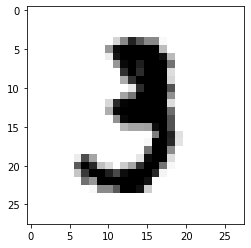

In [ ]:
# let's visualize some examples to see what we have here
import matplotlib.pyplot as plt

plt.imshow(train_images[10], cmap=plt.cm.binary)
plt.show()

In [ ]:
# we have 60000 examples(images) that are 28x28 each (on greyscale) and they are all filled with numbers between 0-255(the higher the number is the more grey the image is)
# so, we transform(reshape) these images in an array with shape (28, 28, 1) with values between 0 and 1
# images must have shape (height, width, channel) in order for them to be inputs at convNets! 
# and we we actually have 60000 examples of 28*28 length each with values between 0 and 1

train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [ ]:
# one-hot representation for train and test labels. As we have 10 classes to predict as output(output is a number between 0-9 representing the digits)
# we transform the output values from 0-9 to 0-1 one-hot representation

print(f'10th element of train_labels before one-hot: {train_labels[10]}')

# one-hot encoding for output labels
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(f'10th element of train_labels after one-hot: {train_labels[10]}')

10th element of train_labels before one-hot: 3
10th element of train_labels after one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
# check the new dimensions now
print(f'X_train: {train_images.shape}')
print(f'y_train: {train_labels.shape}')
print(f'X_test: {test_images.shape}')
print(f'y_test: {test_labels.shape}')

X_train: (60000, 28, 28, 1)
y_train: (60000, 10)
X_test: (10000, 28, 28, 1)
y_test: (10000, 10)


2. Define and train the model

Convolutions are defined by 2 key parameters: the filter size, eg 3x3 or 5x5 and the number of fiters, eg 32 or 64, etc. A convolution works by sliding these filters over the 3D input(width, height, channel) feature map, stopping at every possible locatio and extracting the 3D patch of surrounding features

Each such 3D patch is then transformed into a 1D vector of shape and, finally, all of these vectors reassembled into a 3D output map of shape (height, width, channel). More at book's page 125

In [ ]:
# import the aproppriate modules
from tensorflow import keras
from tensorflow.keras import layers

# network's architecture

model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# compilation step
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128) 

Epoch 1/5
469/469 [==============================] - 17s 14ms/step - loss: 0.2271 - accuracy: 0.9303
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0557 - accuracy: 0.9825
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0384 - accuracy: 0.9876
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0288 - accuracy: 0.9908
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0231 - accuracy: 0.9926


In [ ]:
# check some model's info
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

3. Predict and evaluate the model

In [ ]:
# predict on test images
# returns a 10-element for each example with the highest probability in the index which represents a digit

predictions = model.predict(test_images)

print(f'\n the digit-prediction for the first element of test_labels is: {predictions[10]}\n')
print(f'the actual-digit of the first element of test_labels is: {test_labels[10]}')

313/313 [==============================] - 2s 6ms/step

 the digit-prediction for the first element of test_labels is: [1.0000000e+00 4.7524197e-13 3.1584438e-08 2.5882901e-13 2.1117573e-15
 5.4133989e-11 4.0610063e-10 1.7774678e-11 2.3742384e-09 2.7958080e-09]

the actual-digit of the first element of test_labels is: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'the loss of the model is: {test_loss}')
print(f'the accuracy of the model is: {test_acc}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0294 - accuracy: 0.9906
the loss of the model is: 0.02943180501461029
the accuracy of the model is: 0.9905999898910522


## Example 2. Classifying a small dataset of images as cats or dogs using ConvNets

This is a simple binary classification problem

1. Load the data and understand what you really have

In [ ]:
# this is the way we import datasets from kaggle to colab
! pip install kaggle

!mkdir ~/.kaggle
# we need an API token from kaggle, which can be easily generated and downloaded from the profile section of your Kaggle account
# it is a kaggle.json file and we upload it here in /content directory
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# download the dataset from kaggle
!kaggle competitions download -c dogs-vs-cats

!unzip -qq dogs-vs-cats.zip

!unzip -qq train.zip
!unzip -qq test1.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 810M/812M [00:03<00:00, 250MB/s]
100% 812M/812M [00:03<00:00, 279MB/s]


In [ ]:
# check what we have now 
import os
  
def dir_count(dir_path):
  count = 0
  # Iterate directory
  for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
  return print('File count:', count, 'in', dir_path)

# folder paths
dir_count('/content/train')
dir_count('/content/test1')

File count: 25000 in /content/train
File count: 12500 in /content/test1


To make our job, we only need and take 3 subsets of the downloaded dataset: a training set with 1000 samples of each class, a validation set with 500 samples of each class and a test set with 500 samples of each class

In [ ]:
import shutil, pathlib

original_dir = pathlib.Path("/content/train")
new_base_dir = pathlib.Path("/content/cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [ ]:
# let's see how many images we have in each split now
print('total training cat images: ', len(os.listdir('/content/cats_vs_dogs_small/train/cat')))
print('total training dog images: ', len(os.listdir('/content/cats_vs_dogs_small/train/dog')))
print('total cat images in validation set: ', len(os.listdir('/content/cats_vs_dogs_small/validation/cat')))
print('total dog images in validation set: ', len(os.listdir('/content/cats_vs_dogs_small/validation/dog')))
print('total cat images in test set: ', len(os.listdir('/content/cats_vs_dogs_small/test/cat')))
print('total dog images in test set: ', len(os.listdir('/content/cats_vs_dogs_small/test/dog')))

total training cat images:  1000
total training dog images:  1000
total cat images in validation set:  500
total dog images in validation set:  500
total cat images in test set:  500
total dog images in test set:  500


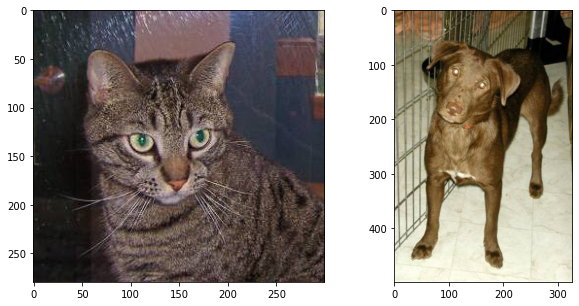

In [ ]:
# let's visualize an image of a cat and a dog
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 1, 1)
img1 = mpimg.imread('/content/cats_vs_dogs_small/train/cat/cat.1.jpg')
imgplot1 = plt.imshow(img1)

ax2 = fig.add_subplot(1, 2, 2)
img2 = mpimg.imread('/content/cats_vs_dogs_small/train/dog/dog.1.jpg')
imgplot2 = plt.imshow(img2)

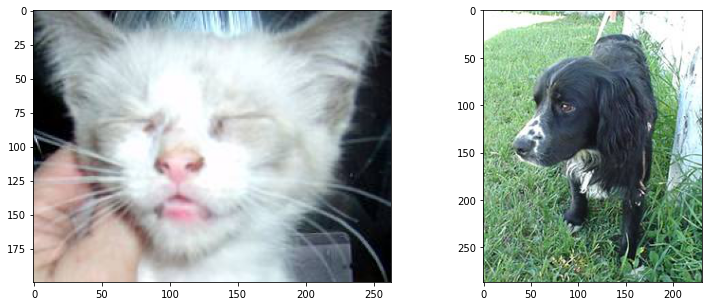

In [ ]:
# and another 2 images from test set
fig = plt.figure(figsize=(25, 5))
ax1 = fig.add_subplot(1, 1, 1)
img1 = mpimg.imread('/content/cats_vs_dogs_small/test/cat/cat.1510.jpg')
imgplot1 = plt.imshow(img1)

ax2 = fig.add_subplot(1, 2, 2)
img2 = mpimg.imread('/content/cats_vs_dogs_small/test/dog/dog.1510.jpg')
imgplot2 = plt.imshow(img2)

2. Data Preprocessing

It is very important to always know what we have as data and what our NN needs as inputs. When data is images, we may need to change the shape of input images to the shape of inputs a NN needs to have

In [ ]:
# a function to use for finding the exact shape of images you have in a dataset
import cv2

def img_shape(dir_path):
  # read image
  img = cv2.imread(dir_path, cv2.IMREAD_UNCHANGED)

  # get dimensions of image
  dimensions = img.shape

  # height, width, number of channels in image
  height = img.shape[0]
  width = img.shape[1]
  channels = img.shape[2]

  print('Image Dimension    : ',dimensions)
  print('Image Height       : ',height)
  print('Image Width        : ',width)
  print('Number of Channels : ',channels)

# let's check the shape of some images
img_shape('/content/cats_vs_dogs_small/train/cat/cat.100.jpg')
img_shape('/content/cats_vs_dogs_small/train/cat/cat.109.jpg')
img_shape('/content/cats_vs_dogs_small/train/cat/cat.192.jpg')

Image Dimension    :  (499, 403, 3)
Image Height       :  499
Image Width        :  403
Number of Channels :  3
Image Dimension    :  (374, 500, 3)
Image Height       :  374
Image Width        :  500
Number of Channels :  3
Image Dimension    :  (374, 500, 3)
Image Height       :  374
Image Width        :  500
Number of Channels :  3


Now, data sits on a drive as jpeg files, so for getting it into the network, we need to: 1) read the picture files, 2) decode jpeg content to RGB grids of pixels, 3) convert these into floating-point tensors and 4) rescale the pixel values from 0-255 to [0,1]. These steps can be automated with ImageDataGenerator module

In [ ]:
# using ImageDataGenerator to read and process images from directories
from keras.preprocessing.image import ImageDataGenerator

# train and validation directories
train_dir = '/content/cats_vs_dogs_small/train'
validation_dir = '/content/cats_vs_dogs_small/validation'
test_dir = '/content/cats_vs_dogs_small/test'

# all image-values will be rescaled
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',      # binary classification -> binary labels
                                                    target_size=(150, 150)) 

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                               batch_size=20,
                                                               class_mode  = 'binary',
                                                               target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                   batch_size=20,
                                                   class_mode  = 'binary',
                                                   target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# let's look at the output of these generators
for data_batch, labels_batch in train_generator:
  print('data batch shape: ', data_batch.shape)
  print('labels batch shape: ', labels_batch.shape)
  break

for data_batch, labels_batch in validation_generator:
  print('data batch shape: ', data_batch.shape)
  print('labels batch shape: ', labels_batch.shape)
  break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)
data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


So, there are 20 samples(batch size) at each batch with a shape of (150, 150, 3) 

3. Define and Train the model

In [ ]:
# import the aproppriate modules
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

# network's architecture
model = keras.Sequential()
# here, we set as input images with (150, 150, 3) shape, an arbitrary choice
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # sigmoid activation as we have a binary-classification problem

# compilation step
model.compile(optimizer=RMSprop(lr=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train the model
history = model.fit_generator(train_generator,    # here we use of fit_generator
                              steps_per_epoch=100,  # for number of images = batch size * steps => steps = 2000/20 here
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=50)   # for 1000 images, we have 1000/20 steps
              

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


100/100 [==============================] - 21s 110ms/step - loss: 0.7131 - accuracy: 0.5235 - val_loss: 0.6852 - val_accuracy: 0.5770
Epoch 2/15
100/100 [==============================] - 11s 106ms/step - loss: 0.6712 - accuracy: 0.5965 - val_loss: 0.6466 - val_accuracy: 0.5970
Epoch 3/15
100/100 [==============================] - 14s 135ms/step - loss: 0.6132 - accuracy: 0.6720 - val_loss: 0.8075 - val_accuracy: 0.5820
Epoch 4/15
100/100 [==============================] - 11s 112ms/step - loss: 0.5760 - accuracy: 0.6935 - val_loss: 0.5897 - val_accuracy: 0.6990
Epoch 5/15
100/100 [==============================] - 11s 106ms/step - loss: 0.5271 - accuracy: 0.7425 - val_loss: 0.5518 - val_accuracy: 0.7100
Epoch 6/15
100/100 [==============================] - 10s 104ms/step - loss: 0.4878 - accuracy: 0.7675 - val_loss: 0.7183 - val_accuracy: 0.6800
Epoch 7/15
100/100 [==============================] - 11s 108ms/step - loss: 0.4451 - accuracy: 0.7915 - val_loss: 0.5990 - val_accuracy: 0.7

In [ ]:
# check some model's info
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
# it is also a good practice to always save your models after training
model.save('cats_and_dogs_small_1.h5')

4. Plots, evaluation and predictions

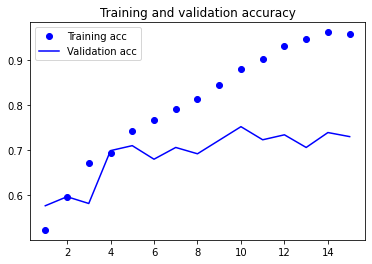

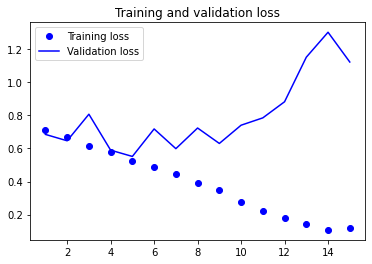

In [ ]:
# displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of Overfitting, so let's go to improve this model

Run the below cell, only and only if the above model is your final model! Here, we face the problem of overfitting, thus, we need to try another model and compare their validation accuracies and losses!

In [ ]:
# evaluate on the test set
#test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) # total images=batch_size*steps=> here is steps=1000/20

#print(f'the loss of the model is: {test_loss}')
#print(f'the accuracy of the model is: {test_acc}')

Saving 2.jpg to 2.jpg
Saving 1.jpg to 1.jpg

The /content/2.jpg image is:



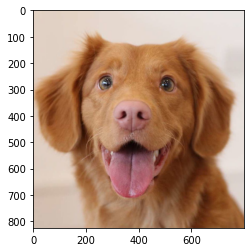

1/1 [==============================] - 0s 16ms/step
[0.99982244]
2.jpg is a dog

The /content/1.jpg image is:



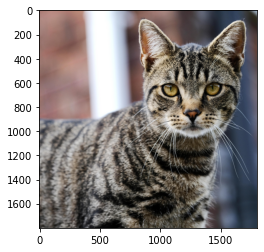

1/1 [==============================] - 0s 16ms/step
[0.3618793]
1.jpg is a cat


In [ ]:
# let's upload some images and predict 
import numpy as np
from google.colab import files
from keras.preprocessing import image

# upload your images
uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  # load image 
  img=keras.utils.load_img(path, target_size=(150, 150))
  # display image
  print(f'\nThe {path} image is:\n')
  dis_img = mpimg.imread(path)
  img_plot = plt.imshow(dis_img)
  plt.show()

  # convert the image pixels to a numpy array
  image = keras.utils.img_to_array(img)
  # adding the fouth dimension, for number of images
  image = np.expand_dims(image, axis=0)    # image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # rescaling image values 
  image = image/255

  images = np.vstack([image])

  # predict and classify
  classes = model.predict(images) 
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

5. Improve the model's accuracy

In this section, we try to address Overifitting and make our model to generalize well on new data. To do that, we do 2 things here: 1) Data Augmentation: we create new data from old ones by augmenting it, so we train our model with more data and 2) we add a new Dropout layer to our old model

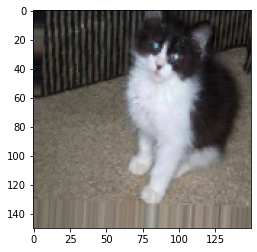

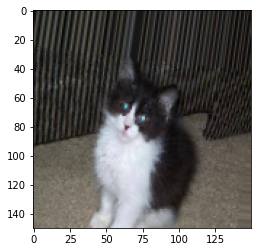

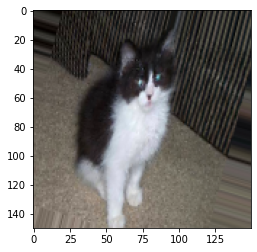

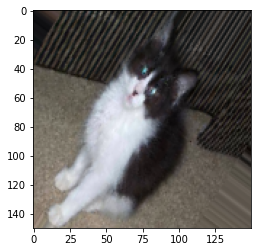

In [ ]:
# let's see an example of how we can generate some new images
# first, set up a new generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# then, create and display some augmented images using the above generator
from tensorflow.keras.preprocessing import image

train_cats_dir = '/content/cats_vs_dogs_small/train/cat'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]  # take a sample from train_cats_dir to augment
img = image.load_img(img_path, target_size=(150,150))  #read the image and resize it

x = image.img_to_array(img)  # convert it to a Numpy array
x = x.reshape((1,) + x.shape)  # reshapes it to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

In [ ]:
# in our case now, create the new data-augmentation generators
# note that we need only to augment data on train set and leaving those in validation and test sets as it is

# we only use generator for training images
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator2 = train_datagen2.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',      # binary classification -> binary labels
                                                    target_size=(150, 150))   # all images resized at (150, 150)


Found 2000 images belonging to 2 classes.


Now, define the new model by adding a new Dropout layer and train it

In [ ]:
# new model's architecture
model = keras.Sequential()
# here, we set as input images with (150, 150, 3) shape, an arbitrary choice
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # sigmoid activation as we have a binary-classification problem

# compilation step
model.compile(optimizer=RMSprop(lr=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train the model
history = model.fit_generator(train_generator2,    # here we use of fit_generator
                              steps_per_epoch=100,  # for number of images = batch size * steps => steps = 2000/20 here
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=50)   # for 1000 images, we have 1000/20 steps

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


100/100 [==============================] - 24s 229ms/step - loss: 0.7015 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5020
Epoch 2/15
100/100 [==============================] - 19s 185ms/step - loss: 0.6925 - accuracy: 0.5545 - val_loss: 0.6640 - val_accuracy: 0.5790
Epoch 3/15
100/100 [==============================] - 24s 240ms/step - loss: 0.6821 - accuracy: 0.5850 - val_loss: 0.6398 - val_accuracy: 0.6520
Epoch 4/15
100/100 [==============================] - 21s 210ms/step - loss: 0.6530 - accuracy: 0.6155 - val_loss: 0.6454 - val_accuracy: 0.6010
Epoch 5/15
100/100 [==============================] - 24s 242ms/step - loss: 0.6387 - accuracy: 0.6365 - val_loss: 0.6001 - val_accuracy: 0.6730
Epoch 6/15
100/100 [==============================] - 20s 205ms/step - loss: 0.6778 - accuracy: 0.6605 - val_loss: 0.5763 - val_accuracy: 0.6780
Epoch 7/15
100/100 [==============================] - 21s 206ms/step - loss: 0.6275 - accuracy: 0.6560 - val_loss: 0.5833 - val_accuracy: 0.6

In each epoch, the ImageDataGenerator applies a transformation on the images you have and use the transformed images for training. The set of transformations includes rotation, zooming, etc. By doing this you're somehow creating new data (i.e. also called data augmentation), but obviously the generated images are not totally different from the original ones. This way the learned model may be more robust and accurate as it is trained on different variations of the same image. In each epoch, each training sample is augmented only one time and therefore 2000(=total number of images for training) transformed images will be generated in each epoch, for example if we train our model for, say, 5 epochs, we have used 5 different versions of each original image in training

In [ ]:
# new model's info
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
# save the new model
model.save('cats_and_dogs_small_2.h5')

New model's plots, evaluation and predictions

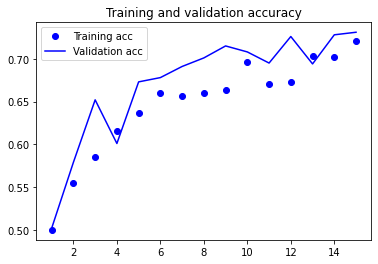

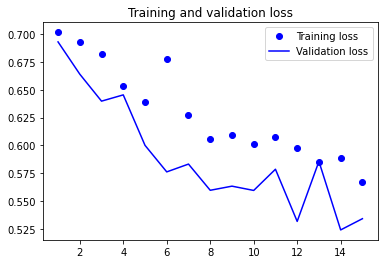

In [ ]:
# displaying curves of loss and accuracy during training of the new model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Always remember to process the test set like the preprocessing you did in train and validation sets. We can't measure thing or evaluate on different types of data. Here, we have already transformed the test data to test_generator's data

In [ ]:
# evaluate the new model on the test set
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) # total images=batch_size*steps=> here is steps=1000/20

print(f'the loss of the model is: {test_loss}')
print(f'the accuracy of the model is: {test_acc}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


the loss of the model is: 0.5714349150657654
the accuracy of the model is: 0.6970000267028809


In [ ]:
# let's predict some images 
predictions = model.predict(test_generator)
print(f'\n the prediction for the 11th element of test generator is: {predictions[10]}\n')
print(f'\n the prediction for the 100th element of test generator is: {predictions[99]}\n')

50/50 [==============================] - 6s 129ms/step

 the prediction for the 11th element of test generator is: [0.0052665]


 the prediction for the 100th element of test generator is: [0.5380067]



Saving 4.jpg to 4.jpg
Saving 3.jpg to 3.jpg

The /content/4.jpg image is:



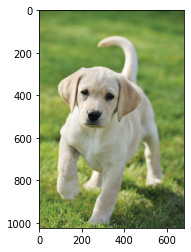

1/1 [==============================] - 1s 578ms/step
[0.9659208]
4.jpg is a dog

The /content/3.jpg image is:



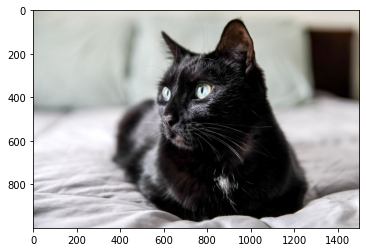

1/1 [==============================] - 0s 15ms/step
[0.22034624]
3.jpg is a cat


In [ ]:
# upload your images and predict
uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  # load image 
  img=keras.utils.load_img(path, target_size=(150, 150))
  # display image
  print(f'\nThe {path} image is:\n')
  dis_img = mpimg.imread(path)
  img_plot = plt.imshow(dis_img)
  plt.show()

  # convert the image pixels to a numpy array
  image = keras.utils.img_to_array(img)
  # adding the fouth dimension, for number of images
  image = np.expand_dims(image, axis=0)    # image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # rescaling image values 
  image = image/255

  images = np.vstack([image])

  # predict and classify
  classes = model.predict(images) 
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

# Example 3. Classifying a small dataset of images as cats or dogs using a pretrained model(Transfer Learning)

This is also a simple binary classification problem

2 ways of using a pretrained model: feature extraction and fine tuning

1. Feature extraction consists of taking the convolutional base(representations learned) from previously trained network, running the new data through it, and training a new classifier on top of the output(@page144)

We will use VGG16 as convolutional base to our model. 

In [ ]:
# instantiating the VGG16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',  # specifies weight check point from which to initialize the model
                  include_top = False,  # we intend to use our densely connected classifier, so we don't need VGG16's densely connected classifier
                  input_shape = (150, 150, 3))  # we also use the same data as the previous example, shapes as (150, 150, 3)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
# details of the conv_base
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

As we can see, the input has a shape of (150, 150, 3) and the final output has shape of (4, 4, 512), which must be the input to our classifier

Our data is the same as previous example. So, we use the ImageDataGenerator to transform images as numpy arrays and scale them to [0,1] values. Then, we use the above conv_base to extract all features from all images 

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/cats_vs_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20  

# function to extract features using the pretrained convolutional base
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512)) # (4, 4, 512) is the shape of each image we need to have as input to the conv_base
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary'  )
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)  # we take the output of conv_base by using as inputs the tranformed data from ImageDataGenerator
    features[i*batch_size : (i+1)*batch_size] = features_batch
    labels[i*batch_size : (i+1)*batch_size] = labels_batch
    i+=1
    if i*batch_size >= sample_count:
      break  # beacause generators yield data indefinitey in a loop, we must break after every image has been seen once
  return features, labels

# extracting features using the above function. Use this process for all of your data: train, validation and test sets!
train_features, train_labels = extract_features(train_dir, 2000)  # as 2000 is the number of images in train_dir
validation_features, validation_labels = extract_features(validation_dir, 1000)  # we have 1000 images in validation set
test_features, test_labels = extract_features(test_dir, 1000)  # also 1000 images in test set

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 22ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 18ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 19ms/step


The extracted features are of shape (sample, 4, 4, 512). We will feed them to a densely connected classifier, so we flatten them to (samples, 8192)

In [ ]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

Define and train our densely connected classifier

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

# model's architecture
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))  # to avoid some Overfitting
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(train_features, train_labels,
                  epochs=30,
                  batch_size=20,
                  validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 7ms/step - loss: 0.6013 - acc: 0.6830 - val_loss: 0.4325 - val_acc: 0.8430
Epoch 2/30
100/100 [==============================] - 3s 34ms/step - loss: 0.4238 - acc: 0.8075 - val_loss: 0.3550 - val_acc: 0.8670
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3588 - acc: 0.8460 - val_loss: 0.3160 - val_acc: 0.8880
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3109 - acc: 0.8700 - val_loss: 0.2946 - val_acc: 0.8890
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2892 - acc: 0.8680 - val_loss: 0.2756 - val_acc: 0.8990
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2643 - acc: 0.8860 - val_loss: 0.2650 - val_acc: 0.9000
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2439 - acc: 0.9060 - val_loss: 0.2591 - val_acc: 0.8990
Epoch 8/30
100/100 [==============================] - 1s 6ms/step - loss: 0

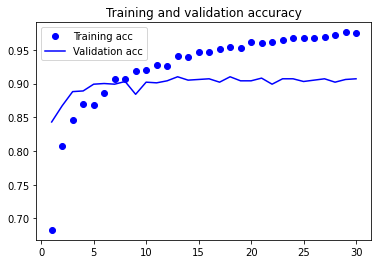

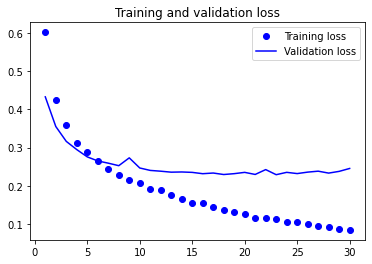

In [ ]:
# displaying curves of loss and accuracy during training of our classifier
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Despite the fact we are using dropout, plots indicate that we are overfitting. Data augmentation is essential in small image dataset like what we have here. Validation accuracy is almost 90% for this model

However, let's try to make some predictions

To make a prediction on any image, we need to transform them as sensors of shape appropriate our NN takes as input. So, here we need to transform images to np.arrays, bring them to shape that our NN has as input(4 dimensions), rescale pixel values. Our NN is comprised of 2 parts here, so we need first to predict on our convolution base and then take its output, reshape it to the appropriate shape, and put it as input to the second part(our model-classifier) for the final prediction

Saving 6.jpg to 6.jpg
Saving 5.jpg to 5.jpg

The /content/6.jpg image is:



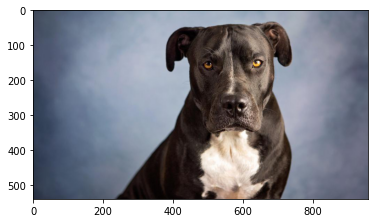

1/1 [==============================] - 0s 19ms/step
[0.89821804]
6.jpg is a dog

The /content/5.jpg image is:



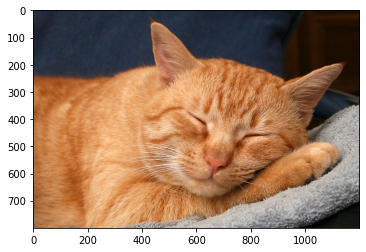

1/1 [==============================] - 0s 14ms/step
[0.00113287]
5.jpg is a cat


In [ ]:
# upload your images and predict
uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn
  # load image 
  img=keras.utils.load_img(path, target_size=(150, 150))
  # display image
  print(f'\nThe {path} image is:\n')
  dis_img = mpimg.imread(path)
  img_plot = plt.imshow(dis_img)
  plt.show()
  # convert the image pixels to a numpy array
  image = keras.utils.img_to_array(img)
  # adding the fouth dimension, for number of images
  image = np.expand_dims(image, axis=0)    # image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # rescaling image values 
  image = image/255

  # 1st step of prediction: take the output of conv_base
  conv_base_pred = conv_base.predict(image)
  # before putting this output as input to our classifier, we need to reshape as we do above in the training
  conv_base_pred = np.reshape(conv_base_pred, (1, 4*4*512))
  images = np.vstack([conv_base_pred])
  
  # 2nd step of prediction: take the output of our classifier
  classes = model.predict(images) 
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Feature extraction with data augmentation

In [ ]:
# new model's architecture
from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)    # concatenate conv_base with our classifier
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# model's info
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


To train this new model, we need to freeze the convolutional base in order to prevent their weights from being updated during training

In [ ]:
# freeze conv_base weights
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

# freeeze 
conv_base.trainable = False

# what we have now, after freezing conv base weights
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


Training the new model with the same data-augmentation configuration that we used in the previous example

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',      # binary classification -> binary labels
                                                    target_size=(150, 150)) 

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                               batch_size=20,
                                                               class_mode  = 'binary',
                                                               target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                   batch_size=20,
                                                   class_mode  = 'binary',
                                                   target_size = (150, 150))

# compile and train the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


100/100 [==============================] - 27s 267ms/step - loss: 0.5763 - acc: 0.7055 - val_loss: 0.4361 - val_acc: 0.8470
Epoch 2/30
100/100 [==============================] - 25s 246ms/step - loss: 0.4750 - acc: 0.7815 - val_loss: 0.3607 - val_acc: 0.8690
Epoch 3/30
100/100 [==============================] - 24s 245ms/step - loss: 0.4234 - acc: 0.8085 - val_loss: 0.3256 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 25s 249ms/step - loss: 0.4026 - acc: 0.8130 - val_loss: 0.3253 - val_acc: 0.8600
Epoch 5/30
100/100 [==============================] - 24s 241ms/step - loss: 0.3890 - acc: 0.8295 - val_loss: 0.2931 - val_acc: 0.8780
Epoch 6/30
100/100 [==============================] - 29s 286ms/step - loss: 0.3759 - acc: 0.8330 - val_loss: 0.2841 - val_acc: 0.8830
Epoch 7/30
100/100 [==============================] - 26s 259ms/step - loss: 0.3574 - acc: 0.8475 - val_loss: 0.2699 - val_acc: 0.8930
Epoch 8/30
100/100 [==============================] - 28s 284ms/st

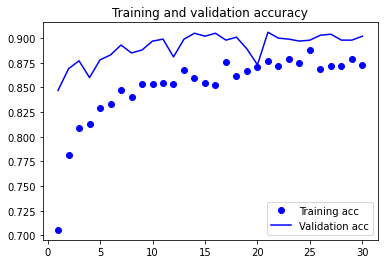

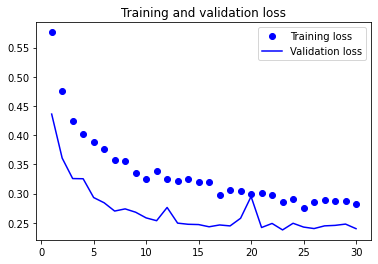

In [ ]:
# let's plot now the loss and the accuracy of new model
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Validation accuracy here is almost the same with the previous model, but the loss is slightly improved, so let's try something else to improve this second model

Run the below cell, only and only if the above model is your final model

In [ ]:
# evaluate the new model on the test set
#test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) # total images=batch_size*steps=> here is steps=1000/20

#print(f'the loss of the model is: {test_loss}')
#print(f'the accuracy of the model is: {test_acc}')

In [ ]:
# let's predict some images from test set/generator
predictions = model.predict(test_generator)
print(f'\n the prediction for the 11th element of test generator is: {predictions[10]}\n')
print(f'\n the prediction for the 100th element of test generator is: {predictions[99]}\n')

50/50 [==============================] - 7s 133ms/step

 the prediction for the 11th element of test generator is: [0.7289459]


 the prediction for the 100th element of test generator is: [0.23987988]



Saving 8.jpg to 8.jpg
Saving 7.jpg to 7.jpg

The /content/8.jpg image is:



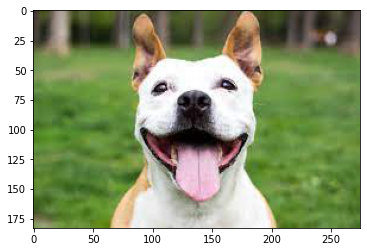

1/1 [==============================] - 0s 129ms/step
[0.99965775]
8.jpg is a dog

The /content/7.jpg image is:



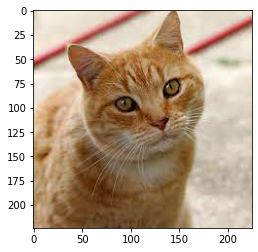

1/1 [==============================] - 0s 16ms/step
[0.00016038]
7.jpg is a cat


In [ ]:
# let's predict some new uploaded images
# upload your images and bring them to the appropriate form
uploaded=files.upload()

for fn in uploaded.keys():
 
  path='/content/' + fn
  # load image 
  img=keras.utils.load_img(path, target_size=(150, 150))
  # display image
  print(f'\nThe {path} image is:\n')
  dis_img = mpimg.imread(path)
  img_plot = plt.imshow(dis_img)
  plt.show()
  # convert the image pixels to a numpy array
  image = keras.utils.img_to_array(img)
  # adding the fouth dimension, for number of images
  image = np.expand_dims(image, axis=0)    # image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # rescaling image values 
  image = image/255
  # stack images
  images = np.vstack([image])
  
  # concatenated model predictions
  classes = model.predict(images) 
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

2. Fine tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model and these top layers(@page153). The whole process: 1) add your custom network on top of an already trained base network, 2) freeze the base network, 3) train the part you added, 4) unfreeze some layers in the base network, 5) jointly train both these layers and the part you added

In [ ]:
# let's see again our already trained base network
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

So, let's keep the last three convolution layers to fine-tune and freeze all the rest up to block4_pool. We keep only these top 3 layers, beacause 1)these are the ones that need to be repurposed on our problem(earlier layers encode more generic and reusable features, whereas top layers encode more specialized features) and 2) the more parameters we train, the more we are at risk of overfitting

In [ ]:
# freezing all layers up to block5_conv1
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

Start fine-tuning the network: conv_base with trainable top 3 conv layers + our classifier. We start by using a very low learning rate 

In [ ]:
# compile and train the new model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


100/100 [==============================] - 30s 292ms/step - loss: 0.3047 - acc: 0.8690 - val_loss: 0.2468 - val_acc: 0.9030
Epoch 2/100
100/100 [==============================] - 34s 343ms/step - loss: 0.2717 - acc: 0.8825 - val_loss: 0.2289 - val_acc: 0.9050
Epoch 3/100
100/100 [==============================] - 31s 307ms/step - loss: 0.2437 - acc: 0.8975 - val_loss: 0.2128 - val_acc: 0.9170
Epoch 4/100
100/100 [==============================] - 26s 258ms/step - loss: 0.2305 - acc: 0.9025 - val_loss: 0.2138 - val_acc: 0.9210
Epoch 5/100
100/100 [==============================] - 24s 244ms/step - loss: 0.2099 - acc: 0.9095 - val_loss: 0.1978 - val_acc: 0.9260
Epoch 6/100
100/100 [==============================] - 23s 230ms/step - loss: 0.2075 - acc: 0.9150 - val_loss: 0.1955 - val_acc: 0.9270
Epoch 7/100
100/100 [==============================] - 23s 234ms/step - loss: 0.2021 - acc: 0.9165 - val_loss: 0.1900 - val_acc: 0.9300
Epoch 8/100
100/100 [==============================] - 26s 2

As we can clearly observe this last model has the highest accuracy(94%) than the two previous ones, so we choose this for our final model. We can further tune the learning rate, to take even higher accuracy

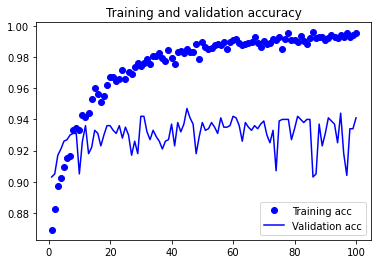

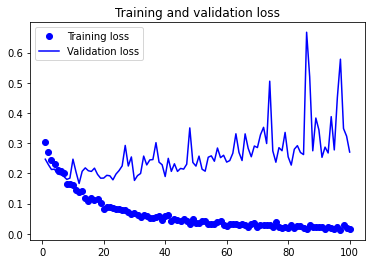

In [ ]:
# plots of loss and the accuracy of the final model
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These curves look noisy, so we can smooth them by replacing every loss and accuracy with exponential moving averages of these quantities

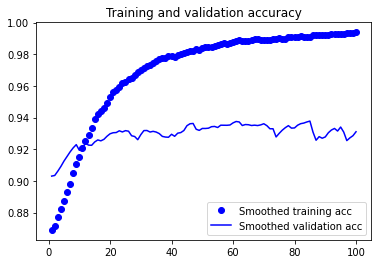

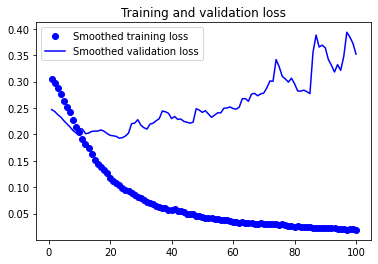

In [ ]:
# smoothing the plots
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
# evaluate this final model on the test set 
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) # total images=batch_size*steps=> here is steps=1000/20

print(f'the loss of the model is: {test_loss}')
print(f'the accuracy of the model is: {test_acc}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


the loss of the model is: 0.34130457043647766
the accuracy of the model is: 0.9440000057220459


In [ ]:
# predictions on some images from test set/generator
predictions = model.predict(test_generator)
print(f'\n the prediction for the 11th element of test generator is: {predictions[10]}\n')
print(f'\n the prediction for the 100th element of test generator is: {predictions[99]}\n')

50/50 [==============================] - 6s 111ms/step

 the prediction for the 11th element of test generator is: [4.385391e-12]


 the prediction for the 100th element of test generator is: [1.]



Saving 10.jpg to 10.jpg
Saving 9.jpeg to 9.jpeg

The /content/10.jpg image is:



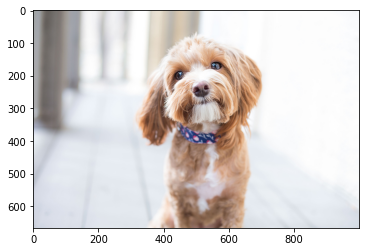

1/1 [==============================] - 0s 17ms/step
[1.]
10.jpg is a dog

The /content/9.jpeg image is:



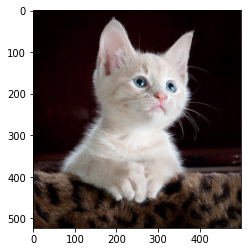

1/1 [==============================] - 0s 17ms/step
[4.0920644e-12]
9.jpeg is a cat


In [ ]:
# predictions on your uploaded images
uploaded=files.upload()

for fn in uploaded.keys():
 
  path='/content/' + fn
  # load image 
  img=keras.utils.load_img(path, target_size=(150, 150))
  # display image
  print(f'\nThe {path} image is:\n')
  dis_img = mpimg.imread(path)
  img_plot = plt.imshow(dis_img)
  plt.show()
  # convert the image pixels to a numpy array
  image = keras.utils.img_to_array(img)
  # adding the fouth dimension, for number of images
  image = np.expand_dims(image, axis=0)    # image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # rescaling image values 
  image = image/255
  # stack images
  images = np.vstack([image])
  
  # concatenated, with top 3 layers of conv_base trainable model's predictions
  classes = model.predict(images) 
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

# Visualizing what ConvNets learn

3 techniques to visualize the representations learned by convnets: 1) visualizing intermediate convent outputs, 2) visualizing convnets filters and 3) visualizing heatmaps of class activation in an image


We are going to quickly see the first technique of visualizing the intermediate activations

It consists of displaying feature maps that are output by various conv or pooling layers in a network, given a certain input

In [ ]:
# let's load the model from exampe 2 
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
# let's take an image and bring it to the appropriate form
img_path = '/content/cats_vs_dogs_small/test/cat/cat.1700.jpg'

#from keras.preprocessing import image
#import numpy as np

# remember to preprocess the image into the shape we train the model!
img = keras.utils.load_img(img_path, target_size=(150, 150))    # load image
img_tensor = keras.utils.img_to_array(img)        # transform it to numpy array=>tensor
img_tensor = np.expand_dims(img_tensor, axis=0)   # transform it to 4D tensor
img_tensor /=255.                                 # all image values rescaled

print(img_tensor.shape)

(1, 150, 150, 3)


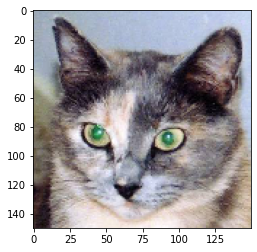

In [ ]:
# display the image
#import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In order to extract the feature maps, we create a model that takes batches of images as input and outputs the activations of all convolution and pooling layers

In [ ]:
# instantiating a model from an input tensor and a list of output tensors
#from keras import models

layer_outputs = [layer.output for layer in model.layers[0:8]] # extract the output of top 8 layers(start counting from the beginning and not from the top Dense layer)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)  # creates a model that has 1 input(that one of the original model) and 8 outputs(layer activations)

So, when fed an image input, this model returns the values of the layer activations in the original model(multi-output model)

In [ ]:
# take the prediction of the image
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 213ms/step


In [ ]:
# let's see some results
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


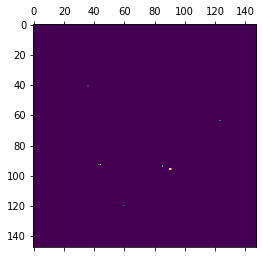

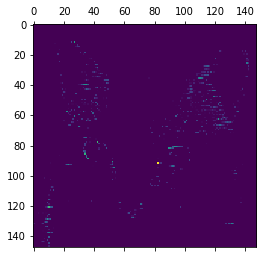

In [ ]:
# visualize some channels from the above activation
#import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')  # 4th of 32 channels of layer 1

plt.matshow(first_layer_activation[0,:,:,7], cmap='viridis')  # 7th of 32 channels of layer 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


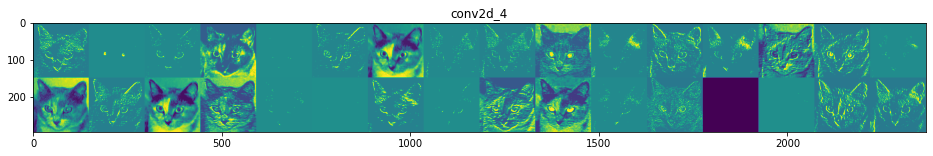

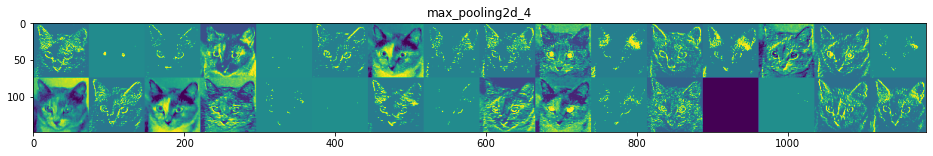

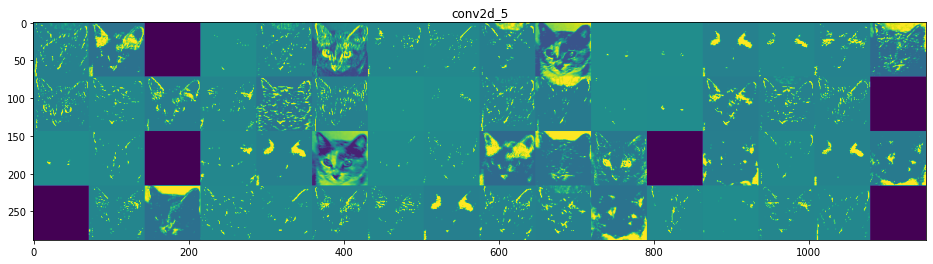

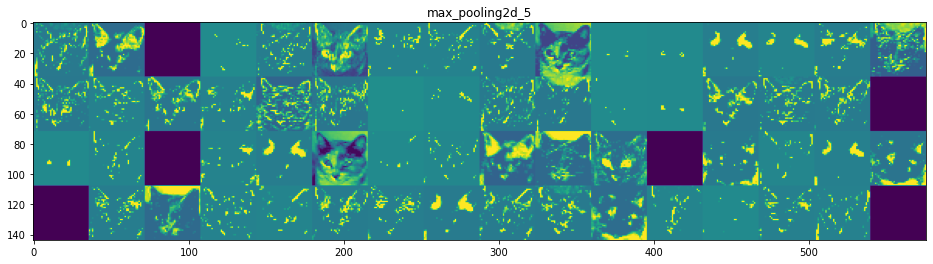

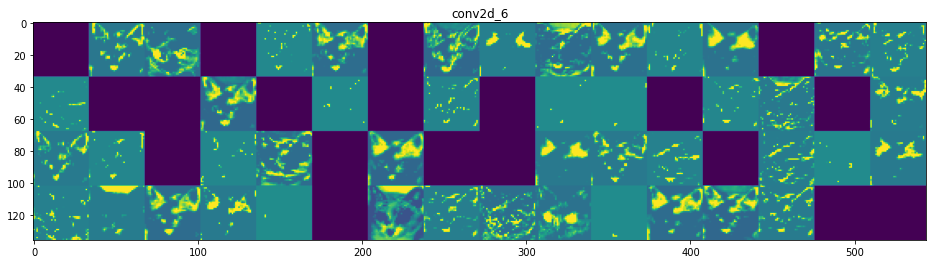

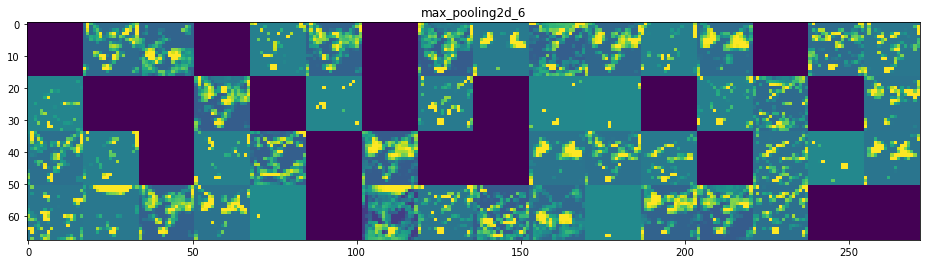

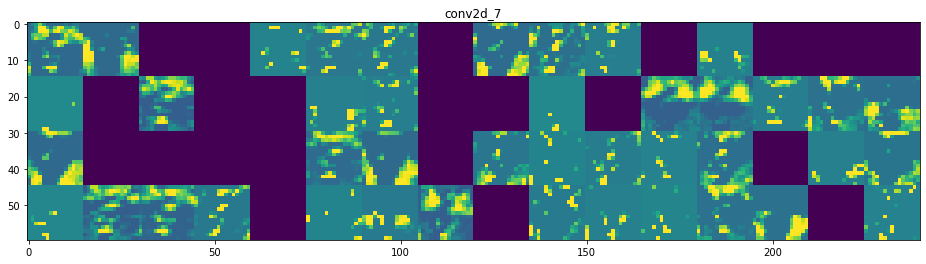

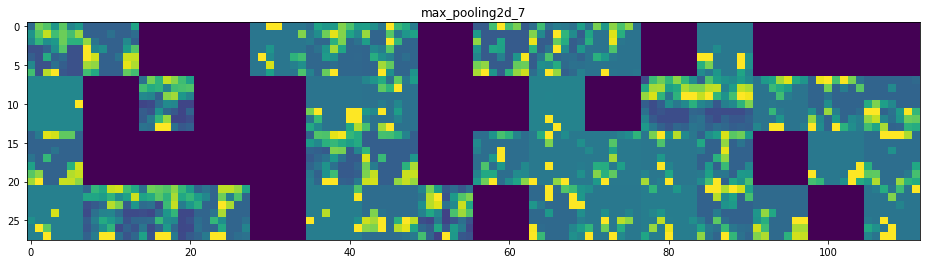

In [ ]:
# visualizing every channel in every intermediate activation
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]

  size = layer_activation.shape[1]

  n_cols = n_features // images_per_row
  display_grid = np.zeros((size*n_cols, images_per_row*size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col*images_per_row + row]

      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col*size : (col+1)*size,
                   row*size : (row+1)*size] = channel_image

  scale = 1./size
  plt.figure(figsize=(scale*display_grid.shape[1],
                      scale*display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

  

The features extracted by a layer become increasigly abstract with the depth of the layer. First layer acts as a collection of various edge detectors. Next layers encode higher level concepts such as cat ear or cat eye. Activations of even higher layers carry less and less information about a specific input being seen and more and more information about the target(@page166)

# Wrapping up

Convnets are the best type of ml models for computer vision tasks. On small datasets, Overfitting will be the main issue. To address Overfitting, use: 1) Data Augmentation + Dropout and 2) Pretrained model by using either a) feature extraction(with or without data augmentation) or b) fine-tuning techniques

Some techniques to visualize the representations learned by convnets are 1) visualizing intermediate convent outputs, 2) visualizing convnet filters(@page167) and 3) visualizing heatmaps of class activation in an image(@page172)